In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
df = pd.read_excel("Veri Detayları23.02.2025 00_19_22.xlsx")
df.head()

C:\Users\himme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Tarih,Adana - Çukurova,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaT,PM10 ( µg/m3 ),PM 2.5 ( µg/m3 ),SO2 ( µg/m3 ),NO2 ( µg/m3 ),NOX ( µg/m3 ),NO ( µg/m3 ),O3 ( µg/m3 )
1,2024-02-23 00:00:56,"55,61","24,29","9,86",-,-,-,"3,84"
2,2024-02-23 01:00:56,"62,47","34,03","11,00",-,-,-,"2,76"
3,2024-02-23 02:00:56,"59,47","33,12","8,81",-,-,-,"2,45"
4,2024-02-23 03:00:56,"64,95","34,40","6,46",-,-,-,"3,20"


In [6]:
df.rename(columns={
    "Adana - Çukurova": "PM10",
    "Unnamed: 2": "PM2.5",
    "Unnamed: 3": "SO2",
    "Unnamed: 4": "NO2",
    "Unnamed: 5": "NOX",
    "Unnamed: 6": "NO",
    "Unnamed: 7": "O3"
}, inplace=True)

In [7]:
df.head()

,Tarih,PM10,PM2.5,SO2,NO2,NOX,NO,O3
0,NaT,PM10 ( µg/m3 ),PM 2.5 ( µg/m3 ),SO2 ( µg/m3 ),NO2 ( µg/m3 ),NOX ( µg/m3 ),NO ( µg/m3 ),O3 ( µg/m3 )
1,2024-02-23 00:00:56,"55,61","24,29","9,86",-,-,-,"3,84"
2,2024-02-23 01:00:56,"62,47","34,03","11,00",-,-,-,"2,76"
3,2024-02-23 02:00:56,"59,47","33,12","8,81",-,-,-,"2,45"
4,2024-02-23 03:00:56,"64,95","34,40","6,46",-,-,-,"3,20"


In [8]:
df["NO2"].unique()

array(['NO2 ( µg/m3 )', '-'], dtype=object)

In [9]:
df["NOX"].unique()

array(['NOX ( µg/m3 )', '-'], dtype=object)

In [10]:
df["NO"].unique()

array(['NO ( µg/m3 )', '-'], dtype=object)

In [11]:
df.drop(["NO2", "NOX", "NO"], axis= 1, inplace= True)

In [12]:
df.drop(index=0, inplace= True)

In [13]:
df.head()

,Tarih,PM10,PM2.5,SO2,O3
1,2024-02-23 00:00:56,"55,61","24,29","9,86","3,84"
2,2024-02-23 01:00:56,"62,47","34,03","11,00","2,76"
3,2024-02-23 02:00:56,"59,47","33,12","8,81","2,45"
4,2024-02-23 03:00:56,"64,95","34,40","6,46","3,20"
5,2024-02-23 04:00:56,"58,10","34,69","4,70","7,66"


In [14]:
len(df)

8785

In [15]:
df.drop("Tarih", axis= 1, inplace= True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8785 entries, 1 to 8785
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   PM10    8785 non-null   object
 1   PM2.5   8785 non-null   object
 2   SO2     8785 non-null   object
 3   O3      8785 non-null   object
dtypes: object(4)
memory usage: 274.7+ KB


In [17]:
df = df.replace({'-': None, ',': '.'}, regex=True)


In [18]:
df["PM10"] = pd.to_numeric(df["PM10"].replace('-', None), errors='coerce')
df["PM2.5"] = pd.to_numeric(df["PM2.5"].replace('-', None), errors='coerce')
df["SO2"] = pd.to_numeric(df["SO2"].replace('-', None), errors='coerce')
df["O3"] = pd.to_numeric(df["O3"].replace('-', None), errors='coerce')

In [19]:
df.head()

,PM10,PM2.5,SO2,O3
1,55.61,24.29,9.86,3.84
2,62.47,34.03,11.00,2.76
3,59.47,33.12,8.81,2.45
4,64.95,34.40,6.46,3.20
5,58.10,34.69,4.70,7.66


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8785 entries, 1 to 8785
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM10    8065 non-null   float64
 1   PM2.5   3063 non-null   float64
 2   SO2     8564 non-null   float64
 3   O3      8427 non-null   float64
dtypes: float64(4)
memory usage: 274.7 KB


In [21]:
# AQI hesaplama fonksiyonu
def calculate_aqi(value, breakpoints):
    """
    Belirtilen kirletici konsantrasyonu icin AQI hesaplar.
    value: Olculen hava kirliligi degeri
    """
    for low, high, aqi_low, aqi_high in breakpoints:
        if low <= value <= high:
            return ((aqi_high - aqi_low) / (high - low)) * (value - low) + aqi_low
    return np.nan 

# PM10 icin breakpoint degerleri (ug/m3)
pm10_breakpoints = [
    (0, 54, 0, 50),
    (55, 154, 51, 100),
    (155, 254, 101, 150),
    (255, 354, 151, 200),
    (355, 424, 201, 300),
    (425, 604, 301, 500)
]

# PM2.5 breakpoint degerleri (ug/m3)
pm25_breakpoints = [
    (0, 12, 0, 50),
    (12.1, 35.4, 51, 100),
    (35.5, 55.4, 101, 150),
    (55.5, 150.4, 151, 200),
    (150.5, 250.4, 201, 300),
    (250.5, 500.4, 301, 500)
]

# SO2 icin breakpoint degerleri (ppb) - 1 saatlik ortalama 
so2_breakpoints = [
    (0, 35, 0, 50),
    (36, 75, 51, 100),
    (76, 185, 101, 150),
    (186, 304, 151, 200),
    (305, 604, 201, 300),
    (605, 1004, 301, 500)
]

# O3 icin breakpoint degerleri (ppm) - 8 saatlik ortalama kabul edilmistir
o3_breakpoints = [
    (0.0, 54.0, 0, 50),
    (55.0, 70.0, 51, 100),
    (71.0, 85.0, 101, 150),
    (86.0, 105.0, 151, 200),
    (106.0, 200.0, 201, 300)
]

In [22]:
# Her kirletici icin AQI alt-indekslerini hesabi
df["AQI_PM10"] = round(df["PM10"].apply(lambda x: calculate_aqi(x, pm10_breakpoints) if pd.notnull(x) else np.nan),4)
df["AQI_PM25"] = round(df["PM2.5"].apply(lambda x: calculate_aqi(x, pm25_breakpoints) if pd.notnull(x) else np.nan),4)
df["AQI_SO2"]  = round(df["SO2"].apply(lambda x: calculate_aqi(x, so2_breakpoints)  if pd.notnull(x) else np.nan),4)
df["AQI_O3"]   = round(df["O3"].apply(lambda x: calculate_aqi(x, o3_breakpoints)   if pd.notnull(x) else np.nan),4)

In [23]:
# Genel AQI, tum alt-indekslerin en yuksek degeri olarak belirlenir
df["AQI"] = df[["AQI_PM10", "AQI_PM25", "AQI_SO2", "AQI_O3"]].max(axis=1)

# AQI degerine gore hava kalitesi kategorileri olusturalim
df["Kirlilik_Seviyesi"] = pd.cut(df["AQI"],
                                 bins=[0, 50, 100, 150, 200, 300, 500],
                                 labels=["Iyi", "Orta", "Hassas", "Sagliksiz", "Cok Sagliksiz", "Tehlikeli"])

In [24]:
df.head()

,PM10,PM2.5,SO2,O3,AQI_PM10,AQI_PM25,AQI_SO2,AQI_O3,AQI,Kirlilik_Seviyesi
1,55.61,24.29,9.86,3.84,51.3019,76.6356,14.0857,3.5556,76.6356,Orta
2,62.47,34.03,11.00,2.76,54.6973,97.1189,15.7143,2.5556,97.1189,Orta
3,59.47,33.12,8.81,2.45,53.2124,95.2052,12.5857,2.2685,95.2052,Orta
4,64.95,34.40,6.46,3.20,55.9247,97.8970,9.2286,2.9630,97.8970,Orta
5,58.10,34.69,4.70,7.66,52.5343,98.5069,6.7143,7.0926,98.5069,Orta


In [25]:
df[df["Kirlilik_Seviyesi"] == "Tehlikeli"]

,PM10,PM2.5,SO2,O3,AQI_PM10,AQI_PM25,AQI_SO2,AQI_O3,AQI,Kirlilik_Seviyesi
1885,451.74,47.11,5.01,16.78,330.7277,129.5874,7.1571,15.5370,330.7277,Tehlikeli
1886,489.83,76.25,4.89,17.07,373.0736,161.7139,6.9857,15.8056,373.0736,Tehlikeli
1887,438.27,106.35,5.00,17.96,315.7527,177.2555,7.1429,16.6296,315.7527,Tehlikeli
1888,543.38,140.68,5.01,18.03,432.6068,194.9812,7.1571,16.6944,432.6068,Tehlikeli
1889,474.11,133.41,5.06,17.55,355.5972,191.2275,7.2286,16.2500,355.5972,Tehlikeli
2912,534.95,NaN,4.56,12.35,423.2349,NaN,6.5143,11.4352,423.2349,Tehlikeli
6566,585.12,NaN,2.78,5.70,479.0105,NaN,3.9714,5.2778,479.0105,Tehlikeli
6741,473.78,NaN,21.66,2.57,355.2303,NaN,30.9429,2.3796,355.2303,Tehlikeli
6742,514.38,NaN,10.35,NaN,400.3666,NaN,14.7857,NaN,400.3666,Tehlikeli
6789,553.31,NaN,16.97,1.92,443.6463,NaN,24.2429,1.7778,443.6463,Tehlikeli


In [26]:
df.drop("Kirlilik_Seviyesi", axis = 1, inplace= True)

<Axes: >

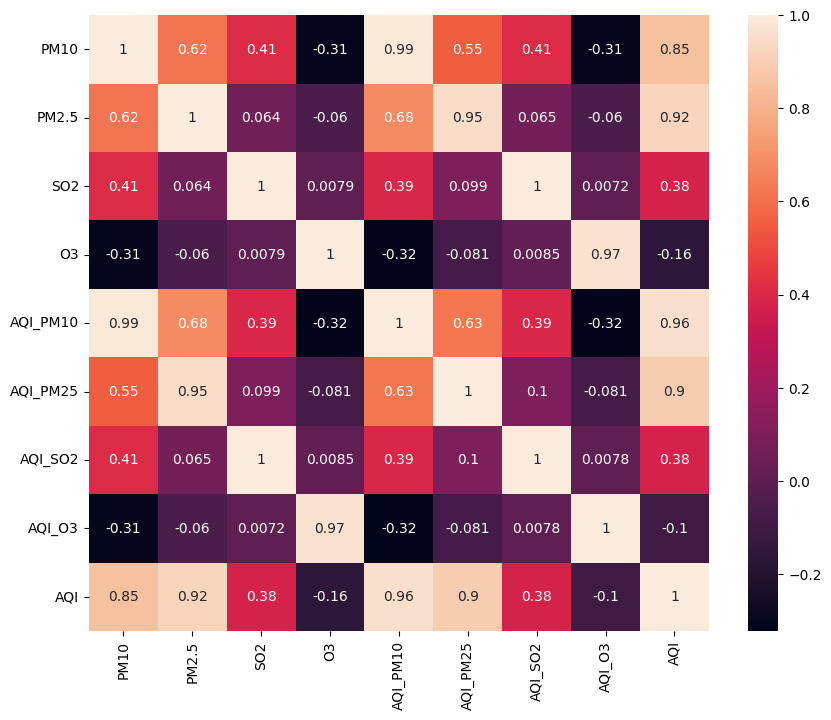

In [27]:
plt.figure(figsize=(10,8), dpi= 100)
sns.heatmap(df.corr(numeric_only= True), annot= True)

<Axes: xlabel='PM2.5', ylabel='AQI'>

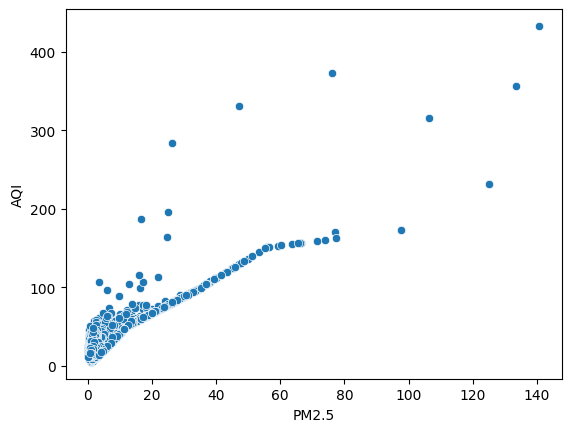

In [49]:
sns.scatterplot(x="PM2.5", y="AQI", data=df)

<Axes: xlabel='PM2.5', ylabel='PM10'>

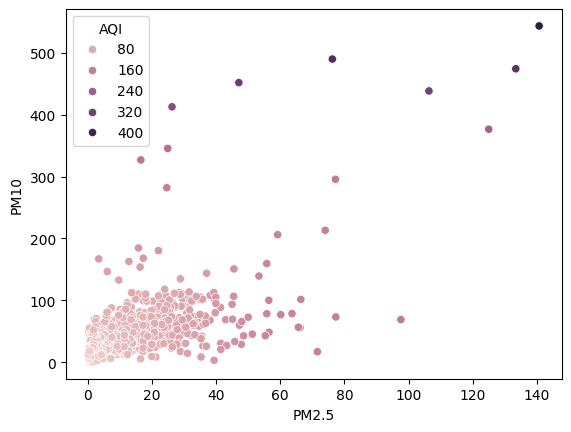

In [50]:
sns.scatterplot(x="PM2.5", y="PM10",hue= "AQI", data=df)

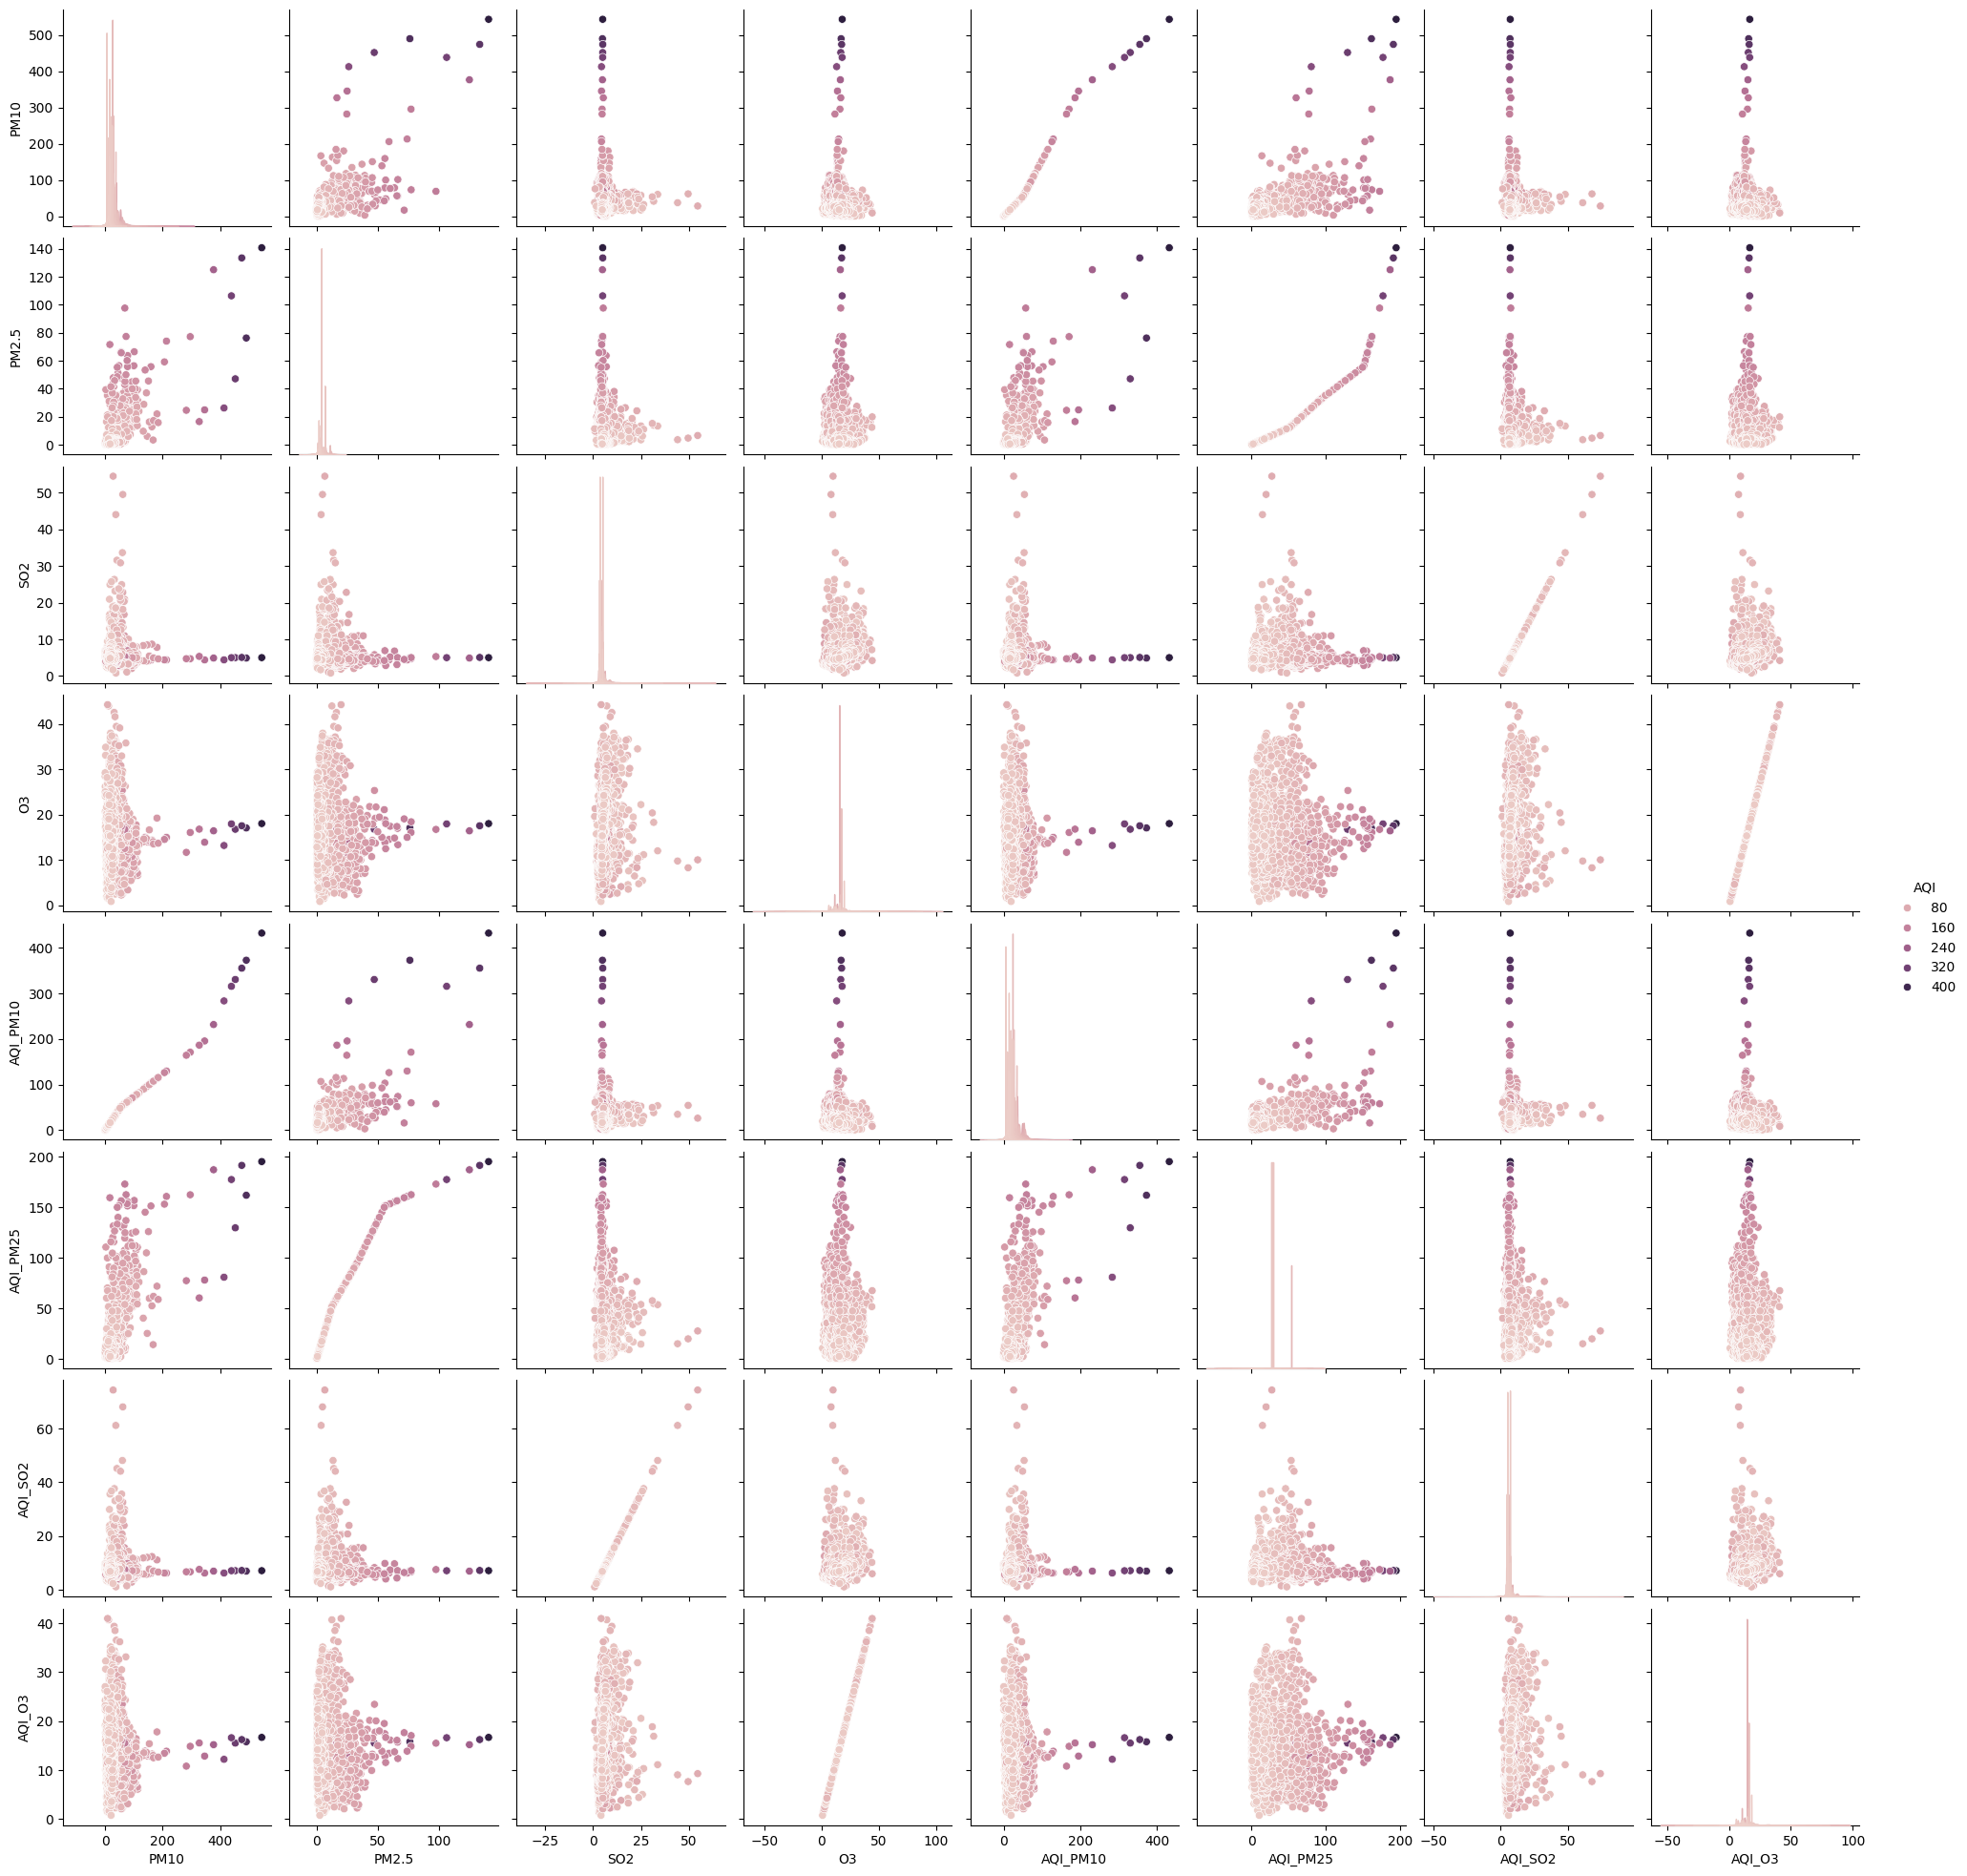

In [51]:
sns.pairplot(data=df, hue="AQI")

#### X ve y

In [28]:
df.isna().sum()

PM10         720
PM2.5       5722
SO2          221
O3           358
AQI_PM10     816
AQI_PM25    5727
AQI_SO2      222
AQI_O3       358
AQI           80
dtype: int64

In [29]:
df.dropna(inplace= True)

In [30]:
len(df)

2936

In [31]:
X = df.drop("AQI", axis= 1)
y = df["AQI"]

In [32]:
### Train Test Split

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
len(df)

2936

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

### Lineer Regresyon

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [38]:
lin_pred = lin_model.predict(X_test)

In [39]:
#### Metrikler

In [40]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [41]:
mae = round(mean_absolute_error(y_test, lin_pred),3)
rmse = round(np.sqrt(mean_squared_error(y_test, lin_pred)),3)
r2 = round(r2_score(y_test, lin_pred),3)

print(f"MAE: {mae}, RMSE: {rmse}, R2 Score: {r2}")

MAE: 4.166, RMSE: 5.99, R2 Score: 0.957


### Polynomial Regresyon

In [42]:
from sklearn.preprocessing import PolynomialFeatures

In [43]:

for d in range(1,6):
    poly_conv = PolynomialFeatures(degree= d)
    X_poly = poly_conv.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=9)

    poly_model = LinearRegression()
    poly_model.fit(X_train, y_train)
    poly_pred = poly_model.predict(X_test)

    mae = round(mean_absolute_error(y_test, poly_pred),3)
    rmse = round(np.sqrt(mean_squared_error(y_test, poly_pred)),3)
    r2 = round(r2_score(y_test, poly_pred),3)

    print(f"MAE: {mae}, RMSE: {rmse}, R2 Score: {r2}")


MAE: 4.166, RMSE: 5.99, R2 Score: 0.957
MAE: 2.368, RMSE: 4.442, R2 Score: 0.976
MAE: 11.209, RMSE: 179.161, R2 Score: -37.748
MAE: 10916.321, RMSE: 235669.774, R2 Score: -67045623.832
MAE: 5182276.646, RMSE: 107413904.787, R2 Score: -13927837213905.87


### Poly model with Best Degree

In [44]:
poly_conv_bst = PolynomialFeatures(degree=2)
X_poly_bst = poly_conv_bst.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly_bst, y, test_size=0.3, random_state=9)

poly_model_bst = LinearRegression()
poly_model_bst.fit(X_train, y_train)
poly_pred_bst = poly_model_bst.predict(X_test)

mae = round(mean_absolute_error(y_test, poly_pred_bst),3)
rmse = round(np.sqrt(mean_squared_error(y_test, poly_pred_bst)),3)
r2 = round(r2_score(y_test, poly_pred_bst),3)

print(f"MAE: {mae}, RMSE: {rmse}, R2 Score: {r2}")


MAE: 2.368, RMSE: 4.442, R2 Score: 0.976


### **Random Forest Regressor**

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
rand_reg = RandomForestRegressor()

In [ ]:
params = {
    "n_estimators" : [50, 100, 150, 200]
    }

In [53]:
grid_model = GridSearchCV(rand_reg, param_grid=params)
grid_model.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(), param_grid={})

In [61]:
grid_pred = grid_model.predict(X_test)

In [63]:
mae = round(mean_absolute_error(y_test, grid_pred),3)
rmse = round(np.sqrt(mean_squared_error(y_test, grid_pred)),3)
r2 = round(r2_score(y_test, grid_pred),4)

print(f"MAE: {mae}, RMSE: {rmse}, R2 Score: {r2}")

MAE: 0.524, RMSE: 2.828, R2 Score: 0.9903
